In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, roc_curve, roc_auc_score
import pandas as pd

RANDOM_SEED = 139

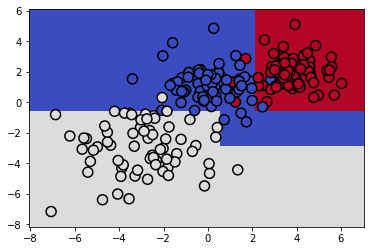

In [2]:
train_data, train_labels = make_blobs(n_samples=200, centers=[(0,1),(-3,-3),(4,2)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(1.2,1.5,1,))

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, 
                                  random_state=RANDOM_SEED)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

In [3]:
df = pd.read_csv('../module6//ml5-bill_authentication.csv')
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['Class'])
y = df['Class']
X, X_valid, Y, Y_valid = train_test_split(x, y, test_size=0.2, random_state = 17)

In [6]:
model = DecisionTreeClassifier(max_depth=3, max_features=2, random_state=17)
model.fit(X, Y)

DecisionTreeClassifier(max_depth=3, max_features=2, random_state=17)

In [7]:
model = DecisionTreeClassifier(max_depth=3, max_features=2, random_state=17)
model.fit(X, Y)
Y_predicted = model.predict(X_valid)
print(f1_score(Y_valid,Y_predicted))

0.8663967611336032


In [8]:
Arr = np.array([2.04378,-0.38422,1.437292,0.76421])
Arr = Arr.reshape(1, -1)
Y_predicted = model.predict(Arr)
Y_predicted[0]

0

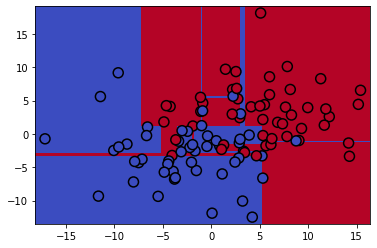

In [9]:
RANDOM_SEED = 139
train_data, train_labels = make_blobs(n_samples=100, centers=[(-3,-3),(4,2)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(5,5))


clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, 
                                  random_state=RANDOM_SEED)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

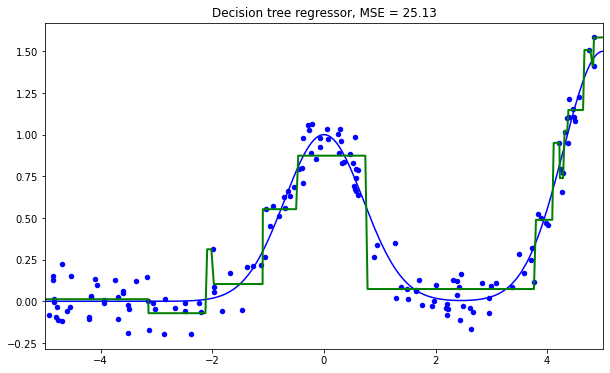

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

RANDOM_SEED = 139

n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 5) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 5) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=4, random_state=RANDOM_SEED)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

In [11]:
df = pd.read_csv('../module6/ml5-petrol_consumption.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [12]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [13]:
x = df.drop(columns=['Petrol_Consumption'])
y = df['Petrol_Consumption']
X, X_valid, Y, Y_valid = train_test_split(x, y, test_size=0.3, random_state = 42)
model = DecisionTreeRegressor(random_state=42)
model.fit(X, Y)

DecisionTreeRegressor(random_state=42)

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
Y_predicted = model.predict(X_valid)
mse = mean_squared_error(Y_valid, Y_predicted)
np.sqrt(mse)


87.96514461232168

In [16]:
model.get_depth()

11

In [17]:
colnames = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]

In [18]:
df = pd.read_csv('./ml5-winequality-red.csv',  names=colnames, header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1600 non-null   object 
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(11), object(1)
memory usage: 150.1+ KB


In [19]:
df = df.loc[1:]
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [20]:
df.quality = df.quality.apply(lambda x: 1 if x >= 6.0 else 0)

In [21]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [22]:
from sklearn.linear_model import LogisticRegression
x = df.drop(columns=['quality'])
y = df['quality']
X, X_valid, Y, Y_valid = train_test_split(x, y, test_size=0.3, random_state = 42)


In [23]:
modelR = LogisticRegression()
modelR.fit(X, Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [24]:
Y_predicted = modelR.predict(X_valid)
print(f1_score(Y_valid,Y_predicted))

0.7528517110266161


In [25]:
model = DecisionTreeClassifier(max_depth=10, random_state=42)
model.fit(X, Y)
Y_predicted = model.predict(X_valid)
print(f1_score(Y_valid,Y_predicted))

0.7927927927927927


In [26]:
from sklearn.ensemble import BaggingClassifier
m = BaggingClassifier(base_estimator = model, random_state=42,  n_estimators=1500)

In [27]:
m.fit(X,Y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        random_state=42),
                  n_estimators=1500, random_state=42)

In [28]:
Y_predicted = m.predict(X_valid)
print(f1_score(Y_valid,Y_predicted))

0.8181818181818181


In [42]:
weather = pd.read_csv('./ml5-temps_extended.csv')
weather.head()

,year,month,day,weekday,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
0,2011,1,1,Sat,4.92,0.00,0,36,37,45.6,40,40
1,2011,1,2,Sun,5.37,0.00,0,37,40,45.7,39,50
2,2011,1,3,Mon,6.26,0.00,0,40,39,45.8,42,42
3,2011,1,4,Tues,5.59,0.00,0,39,42,45.9,38,59
4,2011,1,5,Wed,3.80,0.03,0,42,38,46.0,45,39


In [43]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     2191 non-null   int64  
 1   month    2191 non-null   int64  
 2   day      2191 non-null   int64  
 3   weekday  2191 non-null   object 
 4   ws_1     2191 non-null   float64
 5   prcp_1   2191 non-null   float64
 6   snwd_1   2191 non-null   int64  
 7   temp_2   2191 non-null   int64  
 8   temp_1   2191 non-null   int64  
 9   average  2191 non-null   float64
 10  actual   2191 non-null   int64  
 11  friend   2191 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 205.5+ KB


In [44]:
y = weather['actual']
X = weather.drop(['actual','weekday','month','day','year'],axis =1)
X_train, X_val, Y_train,Y_val=train_test_split(X,y,test_size=0.3, random_state=42)

In [45]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Параметры по умолчанию:\n')
pprint(rf.get_params())

Параметры по умолчанию:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [46]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [47]:
rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=random_grid,
    n_iter=100, 
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)


In [48]:
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [55]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [56]:
rf.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [57]:
Y_predicted = rf.predict(X_val)
a = mean_squared_error(Y_val,Y_predicted)
print(mean_squared_error(Y_val,Y_predicted))

24.570648328267477


In [58]:
rfb = RandomForestRegressor(random_state = 42, n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', max_depth=10, bootstrap=True)

In [59]:
rfb.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=1000, random_state=42)

In [60]:
Y_predicted = rfb.predict(X_val)
b = mean_squared_error(Y_val,Y_predicted)
print(mean_squared_error(Y_val,Y_predicted))

23.10053911088241


In [ ]:
a - b

5.7

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('HR-dataset.csv')

np.random.seed(42)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

target = 'left'
features = df.columns.drop(target)
features = features.drop('empid')  # Удалим идентификатор пользователя как нерепрезентативный признак
print(features)

X, y = df[features].copy(), df[target]

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')


In [92]:
df.sample(6)

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
5603,6604,0.52,0.49,3,146,2,1,0,0,accounting,medium
857,1858,0.11,0.78,6,303,4,0,1,0,sales,medium
11612,12613,0.58,0.99,3,207,10,0,0,0,technical,low
13549,14550,0.94,0.65,4,213,2,1,0,0,IT,low
266,1267,0.11,0.95,6,286,4,0,1,0,technical,medium
1860,2861,0.75,1.00,5,223,6,0,1,0,accounting,medium


In [88]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low
14995,0.37,0.48,2,160,3,0,0,support,low
14996,0.37,0.53,2,143,3,0,0,support,low
14997,0.11,0.96,6,280,4,0,0,support,low


In [89]:
X['dept'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dept, dtype: int64

In [93]:
X['dept'].value_counts().get

<bound method NDFrame.get of 4140    4140
2720    2720
2229    2229
1227    1227
902      902
858      858
787      787
767      767
739      739
630      630
Name: dept, dtype: int64>

In [94]:
salary_ordinals = {'low': 1, 'medium': 2, 'high': 3}
salary_ordinals.get

<function dict.get(key, default=None, /)>

In [90]:


X['dept'] = X['dept'].apply(X['dept'].value_counts().get)
X['salary'] = X['salary'].apply(salary_ordinals.get)

In [72]:
scaler = StandardScaler()
X = pd.DataFrame(data=scaler.fit_transform(X), columns=X.columns)

In [73]:
def estimate_accuracy(clf, X, y, cv=5):
    return cross_val_score(clf, X, y, cv=5, scoring='f1').mean()

In [74]:
tree = DecisionTreeClassifier(max_depth=30)
print("Decision tree:", estimate_accuracy(tree, X, y))

Decision tree: 0.9450045314500757


In [75]:
bagging_trees = BaggingClassifier(tree)
print("Decision tree bagging:", estimate_accuracy(bagging_trees, X, y))

Decision tree bagging: 0.9745837353643367


In [76]:
random_tree = DecisionTreeClassifier(max_features=int(np.sqrt(len(features))), max_depth=30)
print("Random tree:", estimate_accuracy(random_tree, X, y))

Random tree: 0.9540713833978115


In [77]:
bagging_random_trees = BaggingClassifier(random_tree)
print("Random tree bagging:", estimate_accuracy(bagging_random_trees, X, y))

Random tree bagging: 0.9791073387690844


In [78]:
random_forest = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    max_features=int(np.sqrt(len(features))),
    max_depth=30)
print("Random Forest:", estimate_accuracy(random_forest, X, y))

Random Forest: 0.9829834277014811


In [79]:
random_forest = RandomForestClassifier(
    n_estimators=100,
    max_features=int(np.sqrt(len(features))),
    max_depth=30,
    oob_score=True,
    n_jobs=-1
)
random_forest.fit(X, y)
random_forest.oob_score_.mean()

0.9929995333022201

In [80]:
lr = LogisticRegression(solver='saga', max_iter=200)
lr.fit(X, y)
print("LR:", estimate_accuracy(lr, X, y))

LR: 0.44172459802488306


In [81]:
random_logreg = BaggingClassifier(
    lr,
    n_estimators=10,
    n_jobs=-1,
    random_state=42
)
print("Bagging for LR:", estimate_accuracy(random_logreg, X, y))

Bagging for LR: 0.4365451576623669


In [82]:
random_logreg = BaggingClassifier(
    lr,
    n_estimators=10,
    n_jobs=-1,
    max_features=0.5,
    random_state=42
)
print("Bagging for LR:", estimate_accuracy(random_logreg, X, y))

Bagging for LR: 0.22025904904521182


In [83]:
def plot_predictions(X, y, clf, proba=False, points_size=7, xlabel='x', ylabel='y'):
    """Fits the classifier on the data (X, y) and plots the result on a 2-D plane."""
    def get_grid(data):
        x_std, y_std = data.std(axis=0)
        x_min, x_max = data[:, 0].min() - x_std / 2, data[:, 0].max() + x_std / 2
        y_min, y_max = data[:, 1].min() - y_std / 2, data[:, 1].max() + y_std / 2
        return np.meshgrid(np.linspace(x_min, x_max, num=200),
                           np.linspace(y_min, y_max, num=200))
    
    clf.fit(X, y)
    xx, yy = get_grid(X)
    if proba:
        predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    else:
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        
    plt.figure(figsize=(10.0, 10.0))
    plt.pcolormesh(xx, yy, predicted, cmap=plt.cm.coolwarm, alpha=0.1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=points_size, cmap=plt.cm.coolwarm, alpha=0.90)
    plt.ylim([yy.min(),yy.max()])
    plt.xlim([xx.min(),xx.max()])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    return clf

In [121]:
from sklearn.datasets import load_digits
digits = load_digits()
X = pd.DataFrame(digits.data)
y = digits.target

In [122]:
X = pd.DataFrame(data=scaler.fit_transform(X), columns=X.columns)
X

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,-0.335016,-0.253452,-0.432200,0.268751,0.038508,-0.409724,-0.125023,-0.059078,-0.311047,...,0.055897,-0.209785,-0.023596,-0.299081,-0.697349,0.436944,0.646898,0.379040,-0.505670,-0.196008
1793,0.0,-0.335016,0.167290,0.980343,0.268751,0.921145,-0.108958,-0.125023,-0.059078,-0.624009,...,-0.554103,-0.209785,-0.023596,-0.299081,0.086719,0.894246,0.444164,-0.129523,-0.505670,-0.196008
1794,0.0,-0.335016,-0.884566,-0.196776,0.735366,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-0.697349,-0.706312,0.241430,-0.129523,-0.505670,-0.196008
1795,0.0,-0.335016,-0.674195,-0.432200,-1.131092,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.350769,-0.209785,-0.023596,-0.299081,-0.109298,-0.020358,0.849632,0.887602,-0.505670,-0.196008


In [128]:
def estimate_accuracy(clf, X, y, cv=10):
    return cross_val_score(clf, X, y, cv=10).mean()

In [129]:
tree = DecisionTreeClassifier(max_depth=30)
estimate_accuracy(tree, X, y)

0.830828677839851

In [146]:
tree = DecisionTreeClassifier()
bc = BaggingClassifier(tree, n_estimators=5)
estimate_accuracy(bc, X, y)

0.8747548106765984

In [131]:
tree = DecisionTreeClassifier()
bc = BaggingClassifier(tree, n_estimators=100)
estimate_accuracy(bc, X, y)

0.9220484171322159

In [147]:
tree = DecisionTreeClassifier()
bc = BaggingClassifier(tree, n_estimators=1000)
estimate_accuracy(bc, X, y)

0.9259466170080696

In [148]:
tree = DecisionTreeClassifier()
bc = BaggingClassifier(tree, n_estimators=100, max_features=int(np.sqrt(len(features))))
estimate_accuracy(bc, X, y)

0.8380695220360025

In [139]:
tree = DecisionTreeClassifier(max_features=int(np.sqrt(len(features))))
bc = BaggingClassifier(tree, n_estimators=100)
estimate_accuracy(bc, X, y)

0.949366852886406

In [149]:
tree = DecisionTreeClassifier(max_features=int(np.sqrt(len(features))))
bc = BaggingClassifier(tree, n_estimators=1000)
estimate_accuracy(bc, X, y)

0.9549317194289261

In [150]:
tree = DecisionTreeClassifier(max_features=int(np.sqrt(len(features))))
bc = BaggingClassifier(tree, n_estimators=5)
estimate_accuracy(bc, X, y)

0.8441682184978274

In [151]:
tree = DecisionTreeClassifier(max_features=int(np.sqrt(len(features))))
bc = BaggingClassifier(tree, n_estimators=1000, max_features=int(np.sqrt(len(features))))
estimate_accuracy(bc, X, y)

0.8887057728119181

In [152]:
tree = DecisionTreeClassifier(max_features=int(np.sqrt(len(features))), max_depth=5)
bc = BaggingClassifier(tree, n_estimators=100)
estimate_accuracy(bc, X, y)

0.9120670391061452